In [19]:
p2g <- readRDS("../Peak2Gene_All_Links.rds")
p2g <- p2g[abs(p2g$correlations) >= 0.3, ]
head(p2g)

,Peak,Gene,correlations,p.value,FDR,Type,PeakSummit,TSS,Summit2TSS,strand,orientation
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,10:11845764-11846046,miR_novel1,0.4571932,0.003899950,0.03266485,distal,11845930,11860140,-14210,+,Upstream
10,1:19303624-19303840,miR_novel10,0.3967699,0.005755842,0.04336376,intra,19303723,19322891,-19168,-,Downstream
12,1:19323062-19323363,miR_novel10,0.4727145,0.001084354,0.01361145,distal,19323187,19322891,296,-,Upstream
22,1:37953410-37954896,miR_novel11,0.4632604,0.001336189,0.01583499,distal,37954321,37959877,-5556,+,Upstream
25,1:37961128-37961737,miR_novel11,-0.4499857,0.003974027,0.03306652,promoter,37961638,37959877,1761,+,Downstream
26,1:37962241-37963639,miR_novel11,-0.4069900,0.009498309,0.06089492,promoter,37962472,37959877,2595,+,Downstream


In [20]:
atac <- read.table("../NIP_ATAC_all_tissues_norm_quant_final.tsv", row.names = 1, header = T)
res <- atac[unique(p2g$Peak),]
head(res)

,AM1,AM2,Callus,DBuds,Leaf,Lemma,Palea,Panicle1,Panicle2,Panicle3,⋯,Plumule,PNN,Radicle,Root,SAM2,Seed1,Seed2,Sheath,Stamen,Stem
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10:11845764-11846046,3.616979,4.348002,1.676712,3.279733,1.761943,2.189539,2.307230,2.546035,2.982649,3.461096,⋯,7.100984,2.062340,4.702987,1.874241,2.991039,9.083509,8.798595,3.104309,3.349600,4.342202
1:19303624-19303840,6.513334,6.996689,4.630662,5.644288,3.450471,4.573704,4.819548,6.032426,5.487020,6.966258,⋯,4.391398,7.538998,6.662565,3.364523,7.282236,2.243599,5.686661,3.741090,8.216107,7.653132
1:19323062-19323363,11.685052,13.452168,13.594090,14.525523,8.017802,8.041210,8.300511,21.556238,15.369066,14.186471,⋯,12.079992,11.721765,15.093307,13.827978,16.737678,23.977870,10.691678,6.935310,9.034108,13.221357
1:37953410-37954896,21.775400,18.133575,16.619390,22.137597,13.565706,21.274189,14.851732,20.811843,16.183053,15.832012,⋯,24.132004,14.428608,30.648536,25.831043,27.628947,59.016458,14.233949,33.919051,9.688964,19.405787
1:37961128-37961737,3.291961,3.886254,3.911903,5.073819,12.063295,16.262560,14.187989,3.929840,4.363110,4.307190,⋯,10.297072,5.220531,7.552580,13.524389,5.015993,4.092477,18.495374,8.956502,9.353280,7.540031
1:37962241-37963639,19.699342,20.845589,13.841035,20.448746,25.158189,24.963003,25.131978,19.877363,19.307504,17.861288,⋯,18.621036,22.880467,22.828662,22.951746,22.356289,20.935218,17.765811,21.338665,21.252907,22.817062


In [21]:
anno <- p2g[p2g$Peak %in% rownames(res),]
anno <- anno[!duplicated(anno$Peak), ]
anno <- anno[,c("Peak","Type","correlations")]
rownames(anno) <- anno$Peak
anno$reg <- ifelse(anno$correlations >0,"Postive","Negative") 
anno <- anno[,c("Type","reg")]
head(anno)

,Type,reg
,<chr>,<chr>
10:11845764-11846046,distal,Postive
1:19303624-19303840,intra,Postive
1:19323062-19323363,distal,Postive
1:37953410-37954896,distal,Postive
1:37961128-37961737,promoter,Negative
1:37962241-37963639,promoter,Negative


In [22]:
library(paletteer)
mycol <- c(paletteer::paletteer_d("ggthemes::Tableau_10"), paletteer::paletteer_d("ggthemes::Tableau_20"))
gcols <- setNames(as.character(paletteer_d("ggthemes::Classic_10")[1:3]),unique(anno$Type))
gcols1 <- setNames(c("#FC4E07","#00AFBB"),unique(anno$reg))
#gcols1 <- setNames(c("#FC4E07"),unique(anno$reg))
gcol <- list(Type=gcols, reg=gcols1)
gcol

$Type
     distal       intra    promoter 
"#1F77B4FF" "#FF7F0EFF" "#2CA02CFF" 

$reg
  Postive  Negative 
"#FC4E07" "#00AFBB"

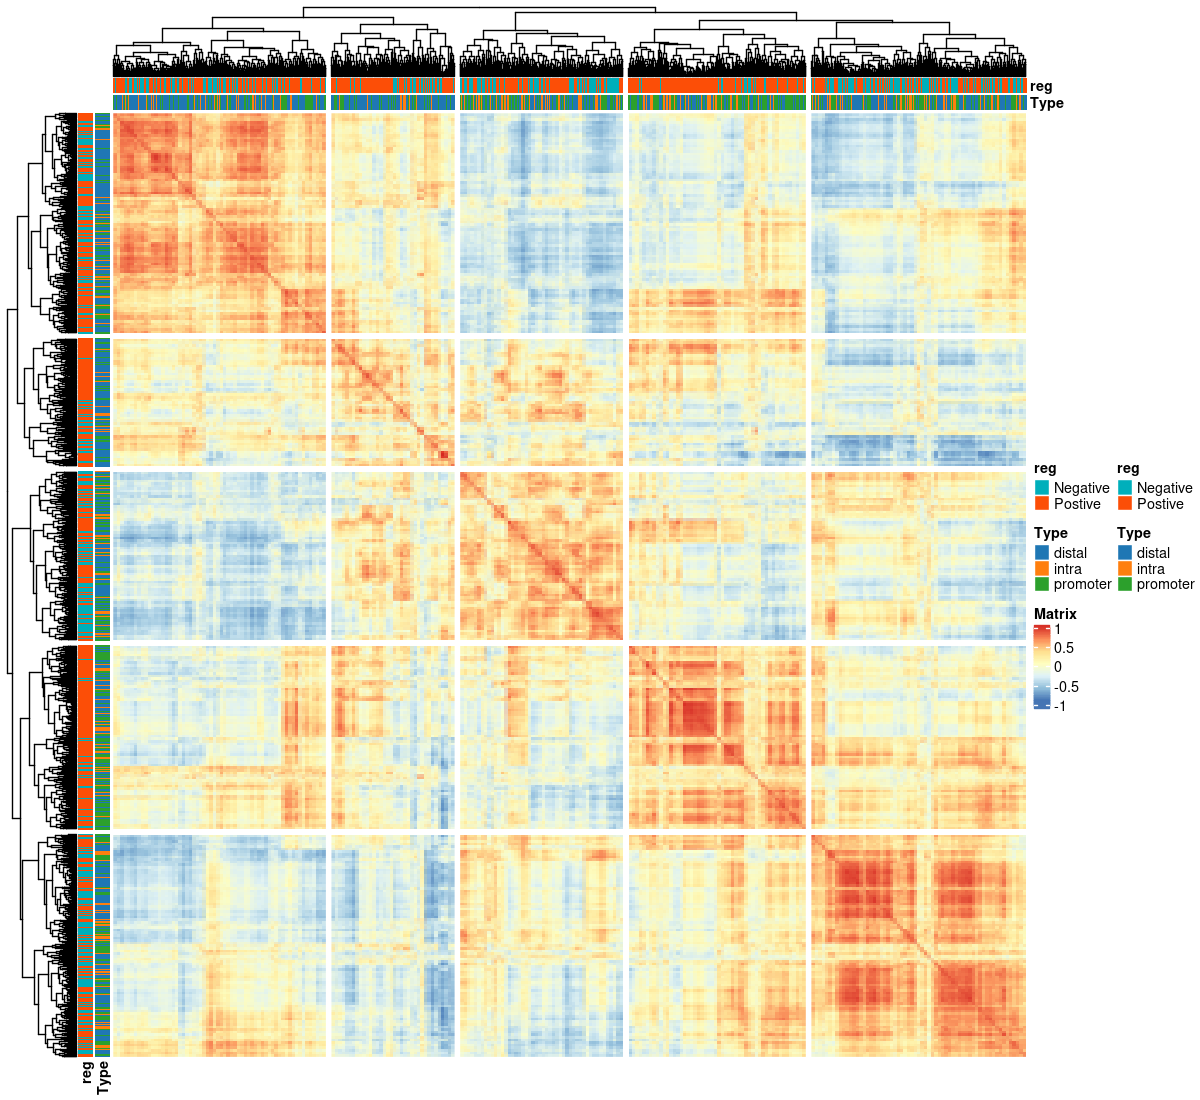

In [25]:
options(repr.plot.width =12, repr.plot.height = 11, repr.plot.res = 100)
p <- ComplexHeatmap::pheatmap(cor(t(res)),show_rownames = F, show_colnames = F,border_color = NA,cutree_rows=5,cutree_cols=5,
              annotation_colors =gcol,annotation_row = anno,annotation_col = anno,use_raster = TRUE)
p

In [74]:
pdf("./figure/Module_Motif_cosine_heatmap_M5.pdf",width=8,height=8)
print(p1)
dev.off()

png 
  2

In [50]:
pairs <- read.table("../motif/tf_pairs/cluster2_TFpairs_heatmap.tsv",check.names = F)
head(pairs)

,OsTCP6,MFO1,AP2/EREBP033,HSFB4B,LOC_Os06g49830,OsMYB30,LOC_Os10g02584,OsWRKY113,LOC_Os06g40710,WFP,⋯,SPW1,MADS63,OsMADS61,OsbHLH033,ERF109,LOC_Os03g56090,OsbHLH090,ERF130,OsZFP,WRKY28
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OsTCP6,0.24137931,0.07427814,0.166091,0.00000000,0.1072113,0.06189845,0.45097439,0.0000000,0.0000000,0,⋯,0.07147417,0.0000000,0.0000000,0,0.07918076,0,0.14888750,0.17546560,0.0000000,0.0
MFO1,0.07427814,0.12000000,0.000000,0.08944272,0.0000000,0.06666667,0.31428571,0.1154701,0.0000000,0,⋯,0.19245009,0.3162278,0.1154701,0,0.04264014,0,0.05345225,0.07559289,0.0000000,0.1
AP2/EREBP033,0.16609096,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0,⋯,0.00000000,0.0000000,0.0000000,0,0.00000000,0,0.00000000,0.00000000,0.0000000,0.0
HSFB4B,0.00000000,0.08944272,0.000000,0.00000000,0.0000000,0.00000000,0.25555063,0.0000000,0.0000000,0,⋯,0.00000000,0.1414214,0.0000000,0,0.00000000,0,0.00000000,0.00000000,0.4472136,0.0
LOC_Os06g49830,0.10721125,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0,⋯,0.00000000,0.0000000,0.0000000,0,0.00000000,0,0.00000000,0.00000000,0.0000000,0.0
OsMYB30,0.06189845,0.06666667,0.000000,0.00000000,0.0000000,0.11111111,0.04761905,0.0000000,0.2357023,0,⋯,0.19245009,0.1054093,0.0000000,0,0.00000000,0,0.00000000,0.06299408,0.0000000,0.0


Warning message:
“The input is a data frame, convert it to the matrix.”


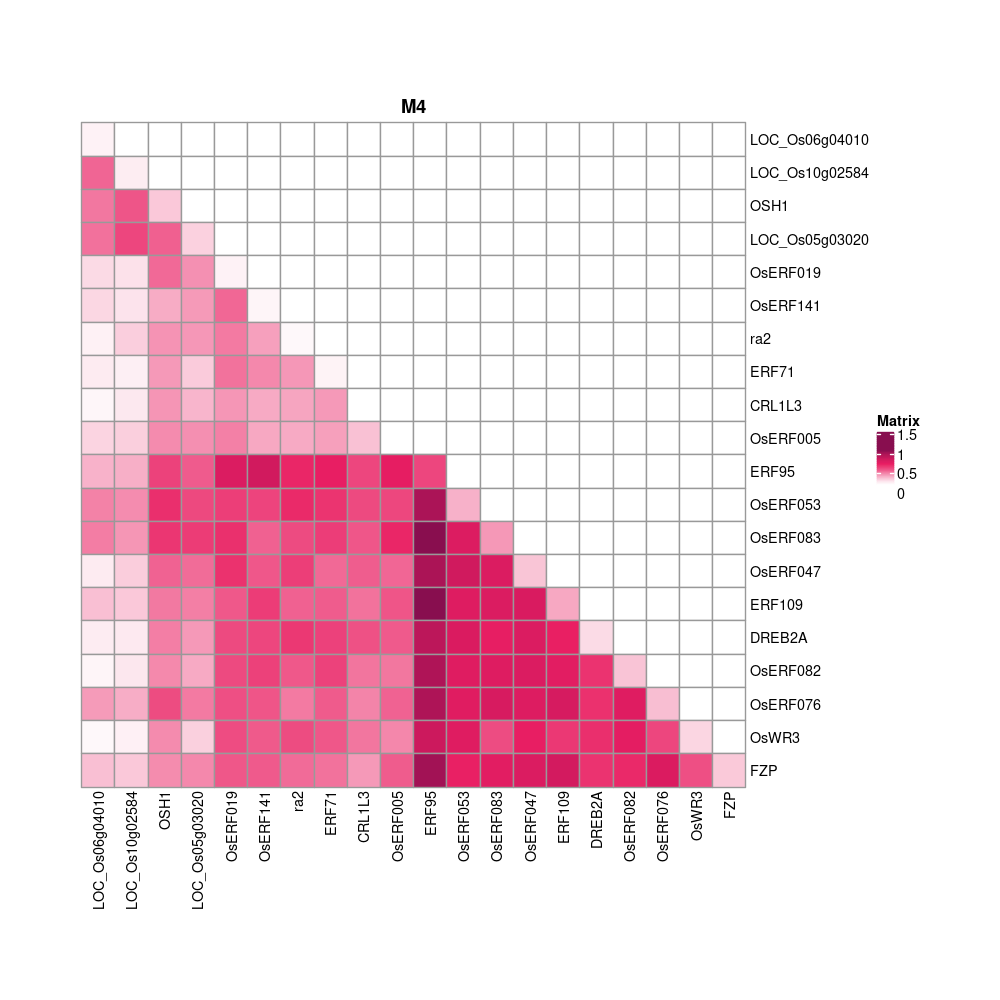

In [99]:
library(reshape)
library(dplyr)
pairs <- read.table("./motif/tf_pairs/cluster4_TFpairs_heatmap.tsv",check.names = F)
pairs <- pairs[as.character(unique(res$name)),as.character(unique(res$name))]
# a <- pairs[,c("TF1","TF2","cosine")]
# a <- a[a$TF1!="MP00266" & a$TF2!="MP00266",]
# rownames(a) <- NULL
# b <- a[a$cosine>0.65,]
clust <- hclust(dist(pairs %>% as.matrix()))
pairs1 <- pairs[clust$labels[clust$order],clust$labels[clust$order]]
pairs1[upper.tri(pairs1)] <- 0
library(pheatmap)
library(paletteer)
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
ComplexHeatmap::pheatmap(pairs1,cellwidth=24,cellheight=24,
         cluster_cols=F,cluster_rows=F,
         color = c(rep("white",4),as.character(paletteer_d("ggsci::pink_material"))), main="M4")

Warning message:
“The input is a data frame, convert it to the matrix.”


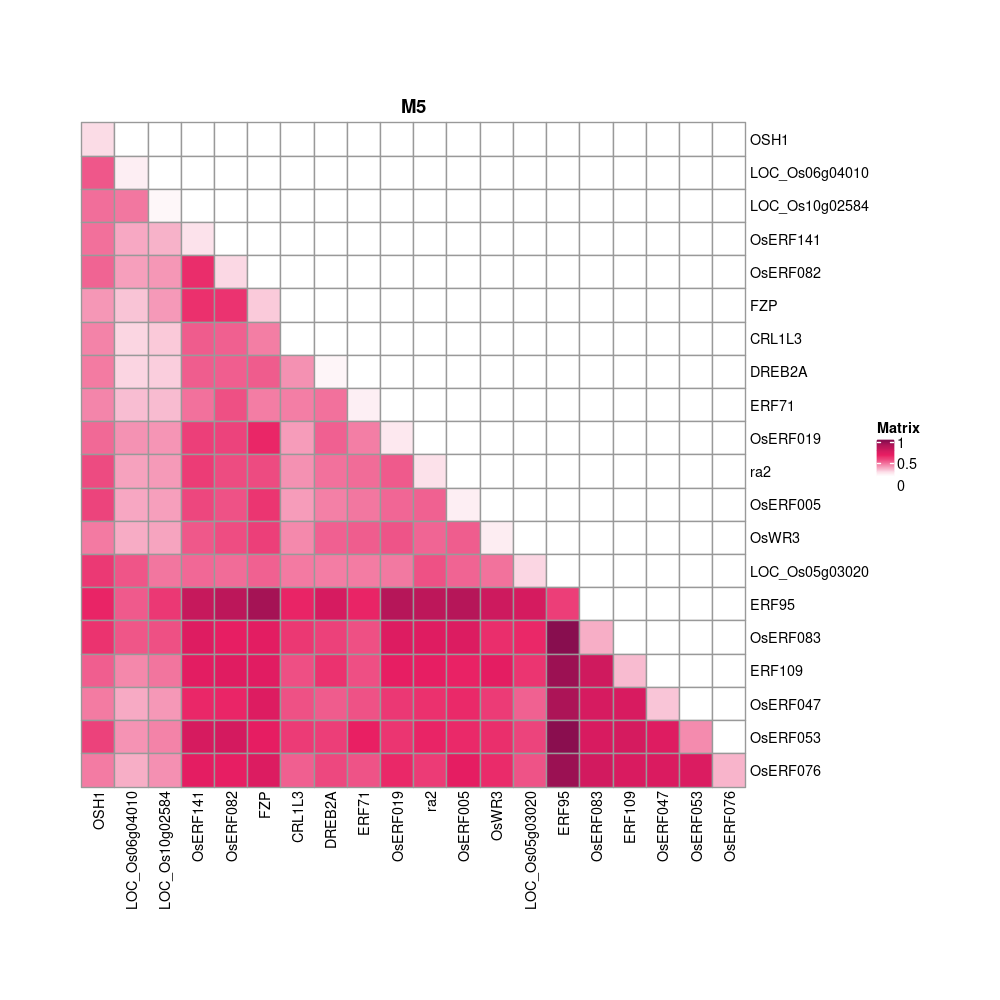

In [100]:
library(reshape)
library(dplyr)
pairs <- read.table("./motif/tf_pairs/cluster5_TFpairs_heatmap.tsv",check.names = F)
pairs <- pairs[as.character(unique(res$name)),as.character(unique(res$name))]
# a <- pairs[,c("TF1","TF2","cosine")]
# a <- a[a$TF1!="MP00266" & a$TF2!="MP00266",]
# rownames(a) <- NULL
# b <- a[a$cosine>0.65,]
clust <- hclust(dist(pairs %>% as.matrix()))
pairs1 <- pairs[clust$labels[clust$order],clust$labels[clust$order]]
pairs1[upper.tri(pairs1)] <- 0
library(pheatmap)
library(paletteer)
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
ComplexHeatmap::pheatmap(pairs1,cellwidth=24,cellheight=24,
         cluster_cols=F,cluster_rows=F,
         color = c(rep("white",4),as.character(paletteer_d("ggsci::pink_material"))), main="M5")

In [107]:
pairs <- read.table("./motif/tf_pairs/cluster2_TFpairs.tsv",check.names = F)
pairs

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
GAMYB-NIGT1,GAMYB,NIGT1,8,5,8,1.2649111,14.463566
OsMYBS3-OsWRKY29,OsMYBS3,OsWRKY29,14,12,11,1.2185436,14.002414
LOC_Os01g09280-OsWRKY29,LOC_Os01g09280,OsWRKY29,8,4,11,1.2060454,13.473170
ERF130-OsERF054,ERF130,OsERF054,22,28,13,1.1531133,11.493298
OsWRKY30-OsWRKY43,OsWRKY30,OsWRKY43,5,3,7,1.0910895,12.485642
GAMYB-R2R3-MYB,GAMYB,R2R3-MYB,12,5,25,1.0733126,11.636192
OsERF005-OsERF054,OsERF005,OsERF054,18,22,13,1.0643623,10.358725
OsWRKY29-OsWRKY30,OsWRKY29,OsWRKY30,6,11,3,1.0444659,12.015511
GAMYB-OsMYBc,GAMYB,OsMYBc,7,5,9,1.0434984,11.902235


In [259]:
library(dplyr)
compareFootprints <- function(samples,motif, smooth_window=5, flanking_length=200, N_cores = 1, color = NA, save_path=NA, file_prefix=NA){
  cal_footprint <- function(gene_bed, coverage_bed, group_name) {
    #logfile("Reading footprint...")
    #gene <- genomation::readBed(gene_bed)
    #gene <- valr::read_bed(gene_bed, n_fields = 6)
    gene <- read.table(gene_bed)[,c(1:6)]
    colnames(gene) <- c("Chr","Start","End","Motif","Score","Strand")
    gene <- GenomicRanges::makeGRangesFromDataFrame(gene, keep.extra.columns=T)
    #logfile("Reading bigwig...")
    coverage <- loadFullBigWig(coverage_bed)
    colnames(coverage) <- c("chr","start","end","coverage","sample")
    cov <- GenomicRanges::makeGRangesFromDataFrame(coverage, keep.extra.columns=T)
    #logfile("Normalize to matrix...")
    mat1 = EnrichedHeatmap::normalizeToMatrix(cov, gene, value_column = "coverage",
                             extend = flanking_length, mean_mode = "w0", w = smooth_window,
                                              smooth = TRUE,background = NA,trim=c(0.01, 0.01))

    res <- data.frame(mat1)
    colnames(res) <- 1:ncol(res)
    aa <- reshape2::melt(res)
    quant_smo <- aa %>% dplyr::group_by(variable) %>% dplyr::summarise(
              mean_value = mean(value, na.rm = TRUE),
              lower_ci = mean(value, na.rm = TRUE) - runif(1, 0.05, 0.1),#qt(0.99999, df = sum(!is.na(value))) * sd(value, na.rm = TRUE) / sqrt(sum(!is.na(value))),
              upper_ci = mean(value, na.rm = TRUE) + runif(1, 0.05, 0.1)#qt(0.99999, df = sum(!is.na(value))) * sd(value, na.rm = TRUE) / sqrt(sum(!is.na(value)))
  )
    quant_smo$idx <- 1:nrow(quant_smo)
    quant_smo$group <- group_name
    #quant_smo <- data.frame(x = c(1:length(colnames(mat1))), density=colMeans(mat1,na.rm=T),group=group_name)
    return(quant_smo)
  }
  lista <- list()
  for (a in motif){
    lista[[a]] <- sprintf("/public/workspace/zhutao/encode/miRNA/motif/tf_pairs/bed/M3/%s", motif)
  }
  listb <- list()
  for (b in samples){
    listb[[b]] <- sprintf("/public/workspace/zhutao/encode/figure/bw/%s_uncorrected.bw", b)
  }
  c <- as.list(samples)
  res <- list()

  res <- parallel::mcmapply(function(gene_bed, coverage_bed, group_name){
    return(cal_footprint(gene_bed, coverage_bed, group_name))
  }, gene_bed=lista, coverage_bed=listb, group_name=c, mc.cores=N_cores, SIMPLIFY = FALSE)

  # res <- parallel::mclapply(function(gene_bed, coverage_bed, group_name){
  #   return(cal_footprint(gene_bed, coverage_bed, group_name))
  # }, gene_bed=lista, coverage_bed=listb, group_name=c, mc.cores=length(samples),SIMPLIFY = FALSE)

  tt <- data.frame(do.call(rbind, res))
  motif_len <- read.table(lista[[1]])
  motif_len$len <- motif_len$V3 - motif_len$V2
  motif_length <- as.integer(unique(motif_len$len))
  linea <- flanking_length / smooth_window
  lineb <- linea + (motif_length / smooth_window)+2
  scale <- (flanking_length + motif_length)/ smooth_window
  options(repr.plot.width = 7, repr.plot.height = 5.5, repr.plot.res = 100)
  if(is.na(color)){
    p3 <- ggplot2::ggplot(tt, aes(x=idx, y=mean_value, color=group, fill = group)) +
          ggplot2::geom_line(size=0.5) +
          ggplot2::scale_color_manual(values = paletteer::paletteer_d("ggthemes::Classic_10"))+
          ggplot2::scale_linetype_manual(values=c(rep("solid",5)))+
          ggpubr::theme_pubr(base_size = 12,base_family = "", border = TRUE, margin = TRUE, legend = c("right"), x.text.angle = 0)+
          ggplot2::geom_vline(xintercept = c(linea, lineb), linetype="dashed", color = "#5C6068", size=0.5)+
          ggplot2::coord_cartesian(expand = T, ylim = c(quantile(tt$mean_value, 0.001), 1.2*quantile(tt$mean_value, 0.999)))+
          #ggplot2::scale_x_continuous(breaks=c(0,0.5 * scale, scale,1.5 * scale, 2 * scale),
          #               labels=c(sprintf("-%s",flanking_length), sprintf("-%s",flanking_length/2), "0",sprintf("%s",flanking_length/2),sprintf("%s",flanking_length)))+
          ggplot2::labs(x = "Distance to motif center (bp)", y = 'Tn5 bias-corrected normalized insertions') + ggplot2::ggtitle(motif)+
          ggplot2::geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill=group,color=NULL), alpha = 0.2)+ggplot2::theme(plot.title = element_text(hjust = 0.5))+
          ggplot2::scale_fill_manual(values = paletteer::paletteer_d("ggthemes::Classic_10"))
  }
#   else{
#     p3 <- ggplot2::ggplot(tt, aes(x=x, y=density, color=group)) +
#           ggplot2::geom_line(size=0.5) +
#           ggplot2::scale_color_manual(values = color)+scale_linetype_manual(values=c(rep("solid",5)))+
#           ggpubr::theme_pubr(base_size = 12,base_family = "", border = TRUE, margin = TRUE, legend = c("right"), x.text.angle = 0)+
#           ggplot2::geom_vline(xintercept = c(linea, lineb), linetype="dashed", color = "#5C6068", size=0.5)+
#           ggplot2::coord_cartesian(expand = T, ylim = c(quantile(tt$density, 0.001), 1.2*quantile(tt$density, 0.999)))+
#           ggplot2::scale_x_continuous(breaks=c(0,0.5 * scale, scale,1.5 * scale, 2 * scale),
#                          labels=c(sprintf("-%s",flanking_length), sprintf("-%s",flanking_length/2), "0",sprintf("%s",flanking_length/2),sprintf("%s",flanking_length)))+
#           ggplot2::labs(x = "Distance to motif center (bp)", y = 'Tn5 bias-corrected normalized insertions') + ggplot2::ggtitle(motif)+
#           ggplot2::geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill=group,color=NULL), alpha = 0.2)+ ggplot2::theme(plot.title = element_text(hjust = 0.5))+
#           ggplot2::scale_fill_manual(values = colors)
#   }
#   if(!is.na(save_path)){
#     pdf(sprintf("%s/%s_%s_Footprint.pdf",save_path, file_prefix, motif),width=7,height=6)
#     print(p3)
#     dev.off()
#   }
  return(p3)
}

In [260]:
loadFullBigWig <- function(bwFile = NULL){
  # loop read bed
  purrr::map_df(1:length(bwFile),function(x){
    tmp <- rtracklayer::import.bw(bwFile[x]) %>%
      data.frame() %>%
      dplyr::select(-width,-strand)

    # sampe name
    spt <- strsplit(bwFile[x],split = "/|.bw|.bigwig") %>% unlist()
    sname <- spt[length(spt)]
    # add name
    tmp$fileName <- sname

    return(tmp)
  }) -> bWData
  return(bWData)
}

In [263]:
for (i in Sys.glob("/public/workspace/zhutao/encode/miRNA/motif/tf_pairs/bed/M3/*.bed")){
    p <- compareFootprints(samples=c("NIP_Root_4_5","NIP_Seed_3d_umi","NIP_Stem_umi","NIP_YP3","NIP_Leaf_4_5"),motif = basename(i),N_cores = 5)
    pdf(sprintf("/public/workspace/zhutao/encode/miRNA/motif/fimo_bed/ft2/M3/%s_M3.pdf",basename(i)),width=7,height=5.5)
    print(p)
    dev.off()
    print(basename(i))
}

[1] "CRL1L3_M3.bed"
[1] "DREB2A_M3.bed"
[1] "EHD2_M3.bed"
[1] "ERF109_M3.bed"
[1] "ERF130_M3.bed"
[1] "ERF71_M3.bed"
[1] "ERF95_M3.bed"
[1] "FZP_M3.bed"
[1] "LOC_Os02g09650_M3.bed"
[1] "LOC_Os03g42430_M3.bed"
[1] "LOC_Os05g03020_M3.bed"
[1] "LOC_Os06g04010_M3.bed"
[1] "LOC_Os10g02584_M3.bed"
[1] "M2347.1.02_M3.bed"
[1] "OsARF10_M3.bed"
[1] "OsDof16_M3.bed"
[1] "OsDof21_M3.bed"
[1] "OsERF017_M3.bed"
[1] "OsERF019_M3.bed"
[1] "OsERF041_M3.bed"
[1] "OsERF044_M3.bed"
[1] "OsERF047_M3.bed"
[1] "OsERF053_M3.bed"
[1] "OsERF054_M3.bed"
[1] "OsERF065_M3.bed"
[1] "OsERF076_M3.bed"
[1] "OsERF082_M3.bed"
[1] "OsERF083_M3.bed"
[1] "OsERF121_M3.bed"
[1] "OsERF141_M3.bed"
[1] "OsGATA10_M3.bed"
[1] "OSH1_M3.bed"
[1] "OsMADS2_M3.bed"
[1] "OsOBF1_M3.bed"
[1] "OsTCP6_M3.bed"
[1] "OsTCP9_M3.bed"
[1] "OsWR3_M3.bed"
[1] "R2R3-MYB_M3.bed"
[1] "ra2_M3.bed"
[1] "SAP16_M3.bed"


In [77]:
a <- read.table("../allTF_pairs_5cluster_cosine_num.tsv",head=T,check.names = F)
a <- a[a$TF1_TF2_count > 30,]
b <- a[a$cosine >= 0.8,]
b <- a %>% group_by(cluster) %>% slice_max(order_by = cosine, n = 50) %>% as.data.frame()
b <- b[b$TF1!="LOC_Os01g60960",]
b <- b[b$TF1!="LOC_Os05g03020",]
head(b)

,TF_pairs_name,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore,cluster,weighted_cosine,Count,median_cosine
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>
1,ERF95-ERF130,ERF95,ERF130,43,30,68,0.9520360,11.025181,cluster1,40.93755,5,0.9520360
2,OsTCP6-OsOBF1,OsTCP6,OsOBF1,33,25,61,0.8450434,9.487312,cluster1,27.88643,5,0.7259527
3,ERF95-ERF109,ERF95,ERF109,37,37,68,0.7376433,7.588224,cluster1,27.29280,5,0.7376433
4,OsERF083-ERF95,OsERF083,ERF95,36,68,37,0.7177070,7.503166,cluster1,25.83745,5,0.8281767
5,OsERF076-ERF95,OsERF076,ERF95,35,68,37,0.6977707,6.909042,cluster1,24.42197,5,0.6977707
6,FZP-ERF95,FZP,ERF95,33,68,33,0.6966305,7.263247,cluster1,22.98881,5,0.6966305


In [75]:
b <- read.table("../figure/venn_cluster.txt",head=T)
head(b)

,TF_pairs_name,cluster
,<chr>,<chr>
1,ERF95-ERF130,cluster1
2,ERF95-ERF130,cluster3
3,ERF95-ERF130,cluster4
4,ERF95-ERF130,cluster5
5,OsERF053-ERF95,cluster3
6,OsERF053-ERF95,cluster4


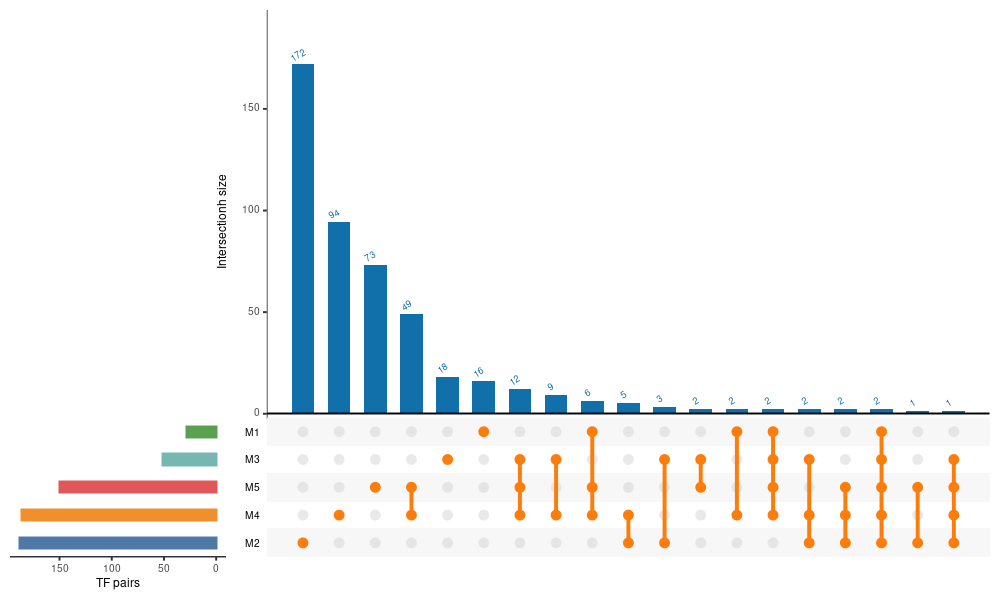

In [76]:
library(UpSetR)
library(ggpubr)
myupset <- function (data, nsets = 5, nintersects = 40, sets = NULL, keep.order = F, 
    set.metadata = NULL, intersections = NULL, matrix.color = "gray23", mat_col=NULL,
    main.bar.color = "gray23", mainbar.y.label = "Intersection Size", 
    mainbar.y.max = NULL, sets.bar.color = "#1170AA", sets.x.label = "Set Size", 
    point.size = 2.2, line.size = 0.7, mb.ratio = c(0.7, 0.3), 
    expression = NULL, att.pos = NULL, att.color = main.bar.color, 
    order.by = c("freq", "degree"), decreasing = c(T, F), show.numbers = "yes", 
    number.angles = 0, group.by = "degree", cutoff = NULL, queries = NULL, 
    query.legend = "none", shade.color = "gray88", shade.alpha = 0.25, 
    matrix.dot.alpha = 0.5, empty.intersections = NULL, color.pal = 1, 
    boxplot.summary = NULL, attribute.plots = NULL, scale.intersections = "identity", 
    scale.sets = "identity", text.scale = 1, set_size.angles = 0, 
    set_size.show = FALSE, set_size.numbers_size = NULL, set_size.scale_max = NULL)  {

    startend <- UpSetR:::FindStartEnd(data)
    first.col <- startend[1]
    last.col <- startend[2]
    if (color.pal == 1) {
        palette <- c("#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", 
            "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", 
            "#17BECF")
    }
    else {
        palette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", 
            "#0072B2", "#D55E00", "#CC79A7")
    }
    if (is.null(intersections) == F) {
        Set_names <- unique((unlist(intersections)))
        Sets_to_remove <- UpSetR:::Remove(data, first.col, last.col, Set_names)
        New_data <- UpSetR:::Wanted(data, Sets_to_remove)
        Num_of_set <-UpSetR:::Number_of_sets(Set_names)
        if (keep.order == F) {
            Set_names <- UpSetR:::order_sets(New_data, Set_names)
        }
        All_Freqs <- UpSetR:::specific_intersections(data, first.col, 
            last.col, intersections, order.by, group.by, decreasing, 
            cutoff, main.bar.color, Set_names)
    }
    else if (is.null(intersections) == T) {
        Set_names <- sets
        if (is.null(Set_names) == T || length(Set_names) == 0) {
            Set_names <- UpSetR:::FindMostFreq(data, first.col, last.col, 
                nsets)
        }
        Sets_to_remove <- UpSetR:::Remove(data, first.col, last.col, Set_names)
        New_data <- UpSetR:::Wanted(data, Sets_to_remove)
        Num_of_set <- UpSetR:::Number_of_sets(Set_names)
        if (keep.order == F) {
            Set_names <- UpSetR:::order_sets(New_data, Set_names)
        }
        All_Freqs <- UpSetR:::Counter(New_data, Num_of_set, first.col, 
            Set_names, nintersects, main.bar.color, order.by, 
            group.by, cutoff, empty.intersections, decreasing)
    }
    Matrix_setup <- UpSetR:::Create_matrix(All_Freqs)
    labels <- UpSetR:::Make_labels(Matrix_setup)
    att.x <- c()
    att.y <- c()
    if (is.null(attribute.plots) == F) {
        for (i in seq_along(attribute.plots$plots)) {
            if (length(attribute.plots$plots[[i]]$x) != 0) {
                att.x[i] <- attribute.plots$plots[[i]]$x
            }
            else if (length(attribute.plots$plots[[i]]$x) == 
                0) {
                att.x[i] <- NA
            }
            if (length(attribute.plots$plots[[i]]$y) != 0) {
                att.y[i] <- attribute.plots$plots[[i]]$y
            }
            else if (length(attribute.plots$plots[[i]]$y) == 
                0) {
                att.y[i] <- NA
            }
        }
    }
    BoxPlots <- NULL
    if (is.null(boxplot.summary) == F) {
        BoxData <- UpSetR:::IntersectionBoxPlot(All_Freqs, New_data, first.col, 
            Set_names)
        BoxPlots <- list()
        for (i in seq_along(boxplot.summary)) {
            BoxPlots[[i]] <- UpSetR:::BoxPlotsPlot(BoxData, boxplot.summary[i], 
                att.color)
        }
    }
    customAttDat <- NULL
    customQBar <- NULL
    Intersection <- NULL
    Element <- NULL
    legend <- NULL
    EBar_data <- NULL
    if (is.null(queries) == F) {
        custom.queries <- UpSetR:::SeperateQueries(queries, 2, palette)
        customDat <- UpSetR:::customQueries(New_data, custom.queries, 
            Set_names)
        legend <- UpSetR:::GuideGenerator(queries, palette)
        legend <- UpSetR:::Make_legend(legend)
        if (is.null(att.x) == F && is.null(customDat) == F) {
            customAttDat <- UpSetR:::CustomAttData(customDat, Set_names)
        }
        customQBar <- UpSetR:::customQueriesBar(customDat, Set_names, 
            All_Freqs, custom.queries)
    }
    if (is.null(queries) == F) {
        Intersection <- UpSetR:::SeperateQueries(queries, 1, palette)
        Matrix_col <- intersects(UpSetR:::QuerieInterData, Intersection, 
            New_data, first.col, Num_of_set, All_Freqs, expression, 
            Set_names, palette)
        Element <- UpSetR:::SeperateQueries(queries, 1, palette)
        EBar_data <- UpSetR:::ElemBarDat(Element, New_data, first.col, 
            expression, Set_names, palette, All_Freqs)
    }
    else {
        Matrix_col <- NULL
    }
    if (!is.null(mat_col)) {
      Matrix_col <- mat_col
    }
    Matrix_layout <- UpSetR:::Create_layout(Matrix_setup, matrix.color, 
        Matrix_col, matrix.dot.alpha)
    Set_sizes <- UpSetR:::FindSetFreqs(New_data, first.col, Num_of_set, 
        Set_names, keep.order)
    Bar_Q <- NULL
    if (is.null(queries) == F) {
        Bar_Q <- intersects(UpSetR:::QuerieInterBar, Intersection, New_data, 
            first.col, Num_of_set, All_Freqs, expression, Set_names, 
            palette)
    }
    QInter_att_data <- NULL
    QElem_att_data <- NULL
    if ((is.null(queries) == F) & (is.null(att.x) == F)) {
        QInter_att_data <- intersects(UpSetR:::QuerieInterAtt, Intersection, 
            New_data, first.col, Num_of_set, att.x, att.y, expression, 
            Set_names, palette)
        QElem_att_data <- elements(UpSetR:::QuerieElemAtt, Element, New_data, 
            first.col, expression, Set_names, att.x, att.y, palette)
    }
    AllQueryData <- UpSetR:::combineQueriesData(QInter_att_data, QElem_att_data, 
        customAttDat, att.x, att.y)
    ShadingData <- NULL
    if (is.null(set.metadata) == F) {
        ShadingData <- UpSetR:::get_shade_groups(set.metadata, Set_names, 
            Matrix_layout, shade.alpha)
        output <- UpSetR:::Make_set_metadata_plot(set.metadata, Set_names)
        set.metadata.plots <- output[[1]]
        set.metadata <- output[[2]]
        if (is.null(ShadingData) == FALSE) {
            shade.alpha <- unique(ShadingData$alpha)
        }
    }
    else {
        set.metadata.plots <- NULL
    }
    if (is.null(ShadingData) == TRUE) {
        ShadingData <- UpSetR:::MakeShading(Matrix_layout, shade.color)
    }
    Main_bar <- suppressMessages(UpSetR:::Make_main_bar(All_Freqs, Bar_Q, 
        show.numbers, mb.ratio, customQBar, number.angles, EBar_data, 
        mainbar.y.label, mainbar.y.max, scale.intersections, 
        text.scale, attribute.plots))
    Matrix <- UpSetR:::Make_matrix_plot(Matrix_layout, Set_sizes, All_Freqs, 
        point.size, line.size, text.scale, labels, ShadingData, 
        shade.alpha)
    Sizes <- UpSetR:::Make_size_plot(Set_sizes, sets.bar.color, mb.ratio, 
        sets.x.label, scale.sets, text.scale, set_size.angles, 
        set_size.show, set_size.scale_max, set_size.numbers_size)
    structure(class = "upset", .Data = list(Main_bar = Main_bar, 
        Matrix = Matrix, Sizes = Sizes, labels = labels, mb.ratio = mb.ratio, 
        att.x = att.x, att.y = att.y, New_data = New_data, expression = expression, 
        att.pos = att.pos, first.col = first.col, att.color = att.color, 
        AllQueryData = AllQueryData, attribute.plots = attribute.plots, 
        legend = legend, query.legend = query.legend, BoxPlots = BoxPlots, 
        Set_names = Set_names, set.metadata = set.metadata, set.metadata.plots = set.metadata.plots))
}


x = list(    M1 = b[b$cluster=="cluster1",]$TF_pairs_name,    
             M2 = b[b$cluster=="cluster2",]$TF_pairs_name,
             M3 = b[b$cluster=="cluster3",]$TF_pairs_name,
             M4 = b[b$cluster=="cluster4",]$TF_pairs_name,
             M5 = b[b$cluster=="cluster5",]$TF_pairs_name)

options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 100)
p10 <- myupset(fromList(x), order.by = "freq",sets = names(lengths(x)),point.size = 3, line.size = 1, 
    mainbar.y.label = "Intersectionh size", sets.x.label = "TF pairs",sets.bar.color=paletteer_d("ggthemes::Tableau_10")[1:5],
               main.bar.color= "#1170AA",matrix.color ="#FC7D0B", number.angles = 30)
p10

In [750]:
pdf("./figure/Fig4_TF_pairs_upset.pdf",width=8,height=4)
print(p10)
dev.off()

png 
  2

In [757]:
df1 <- b[,c("TF1","TF2")]
df1$value <- 1
colnames(df1) <- c("from","to","value")
df1

,from,to,value
,<chr>,<chr>,<dbl>
1,ERF95,ERF130,1
2,OsTCP6,OsOBF1,1
3,ERF95,ERF109,1
4,OsERF083,ERF95,1
5,OsERF076,ERF95,1
6,FZP,ERF95,1
7,PCF2,OsTCP6,1
8,OsTCP6,LOC_Os10g02584,1
9,OsTCP6,LOC_Os06g04010,1


In [758]:
df2 <- data.frame(table(df1$from))
df3 <- data.frame(table(df1$to))


# df2$grp <- c(1:nrow(df2))
# colnames(df2) <- c("name","n","grp")
df4 <- rbind(df2,df3)
df4 <- df4[!duplicated(df4$Var1), ]
df4$grp <- c(1:nrow(df4))
colnames(df4) <- c("name","n","grp")
df4

,name,n,grp
,<fct>,<int>,<int>
1,ERF130,4,1
2,ERF95,14,2
3,FZP,5,3
4,LOC_Os06g04010,1,4
5,LOC_Os10g02584,2,5
6,OsbZIP22,1,6
7,OsDof21,1,7
8,OsERF005,1,8
9,OsERF017,4,9


In [773]:
(0.704022989+0.842696629)/2

[1] 0.7733598

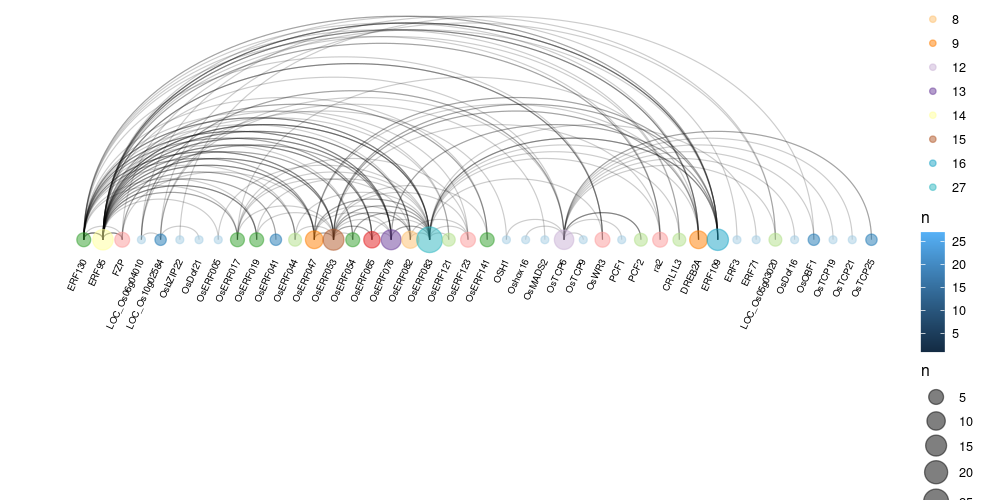

In [769]:
mygraph <- graph_from_data_frame( df1, vertices = df4, directed = FALSE )

# prepare a vector of n color in the viridis scale
#mycolor <- colormap(colormap=colormaps$viridis, nshades=max(df4$grp))
mycolor <- c(paletteer_d("RColorBrewer::Paired"),paletteer_d("ggthemes::Hue_Circle"))
#mycolor <- sample(mycolor, length(mycolor))

options(repr.plot.width =10, repr.plot.height = 5, repr.plot.res = 100)
# Make the graph
p1 <- ggraph(mygraph, layout="linear") + 
  geom_edge_arc(edge_colour="black", edge_alpha=0.2, edge_width=0.3, fold=TRUE) +
  geom_node_point(aes(size=n, color=as.factor(n), fill=n), alpha=0.5) +
  scale_size_continuous(range=c(2,8)) +
  scale_color_manual(values=mycolor) +
  geom_node_text(aes(label=name), angle=65, hjust=1, nudge_y = -1.1, size=2.3) +
  theme_void() +
  theme(
    #legend.position="none",
    plot.margin=unit(c(0,0,0.4,0), "null"),
    panel.spacing=unit(c(0,0,3.4,0), "null")
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-5.6, 1.2)) 
p1

In [771]:
pdf("./figure/Fig4_TF_pairs_cruve2.pdf",width=8,height=8)
print(p1)
dev.off()

png 
  2